In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

sns.set_style("whitegrid")
sns.set_palette("deep")

In [2]:
df = pd.read_csv('Carbon_(CO2)_Emissions_by_Country.csv')

In [533]:
df.head()

,Country,Region,Date,Kilotons of Co2,Metric Tons Per Capita
0,Afghanistan,Asia,01-01-2011,8930.0,0.31
1,Afghanistan,Asia,01-01-2012,8080.0,0.27
2,Afghanistan,Asia,01-01-2010,7110.0,0.25
3,Afghanistan,Asia,01-01-2019,6080.0,0.16
4,Afghanistan,Asia,01-01-2018,6070.0,0.17


In [534]:
df = df.rename(columns={
    'Country': 'Pais',
    'Region': 'Continente',
    'Date': 'Data',
    'Kilotons of Co2': 'Quilotoneladas_de_CO2',
    'Metric Tons Per Capita': 'Toneladas_Métricas_Per_Capita'
})

In [535]:
df.shape

(5677, 5)

In [536]:
df.isnull().sum()

Pais                             0
Continente                       0
Data                             0
Quilotoneladas_de_CO2            0
Toneladas_Métricas_Per_Capita    0
dtype: int64

In [537]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5677 entries, 0 to 5676
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Pais                           5677 non-null   object 
 1   Continente                     5677 non-null   object 
 2   Data                           5677 non-null   object 
 3   Quilotoneladas_de_CO2          5677 non-null   float64
 4   Toneladas_Métricas_Per_Capita  5677 non-null   float64
dtypes: float64(2), object(3)
memory usage: 221.9+ KB


In [538]:
df.nunique()

Pais                              190
Continente                          5
Data                               30
Quilotoneladas_de_CO2            3375
Toneladas_Métricas_Per_Capita    1408
dtype: int64

In [539]:
df.describe()

,Quilotoneladas_de_CO2,Toneladas_Métricas_Per_Capita
count,5.677000e+03,5677.000000
mean,1.412292e+05,4.325505
std,6.491258e+05,5.503834
min,0.000000e+00,0.000000
25%,1.380000e+03,0.570000
50%,9.170000e+03,2.360000
75%,5.848000e+04,6.340000
max,1.070722e+07,47.650000


In [541]:
df.Data = pd.to_datetime(df.Data)
df = df.sort_values("Data")

df["Ano"] = df["Data"].apply(lambda x: str(x.year))

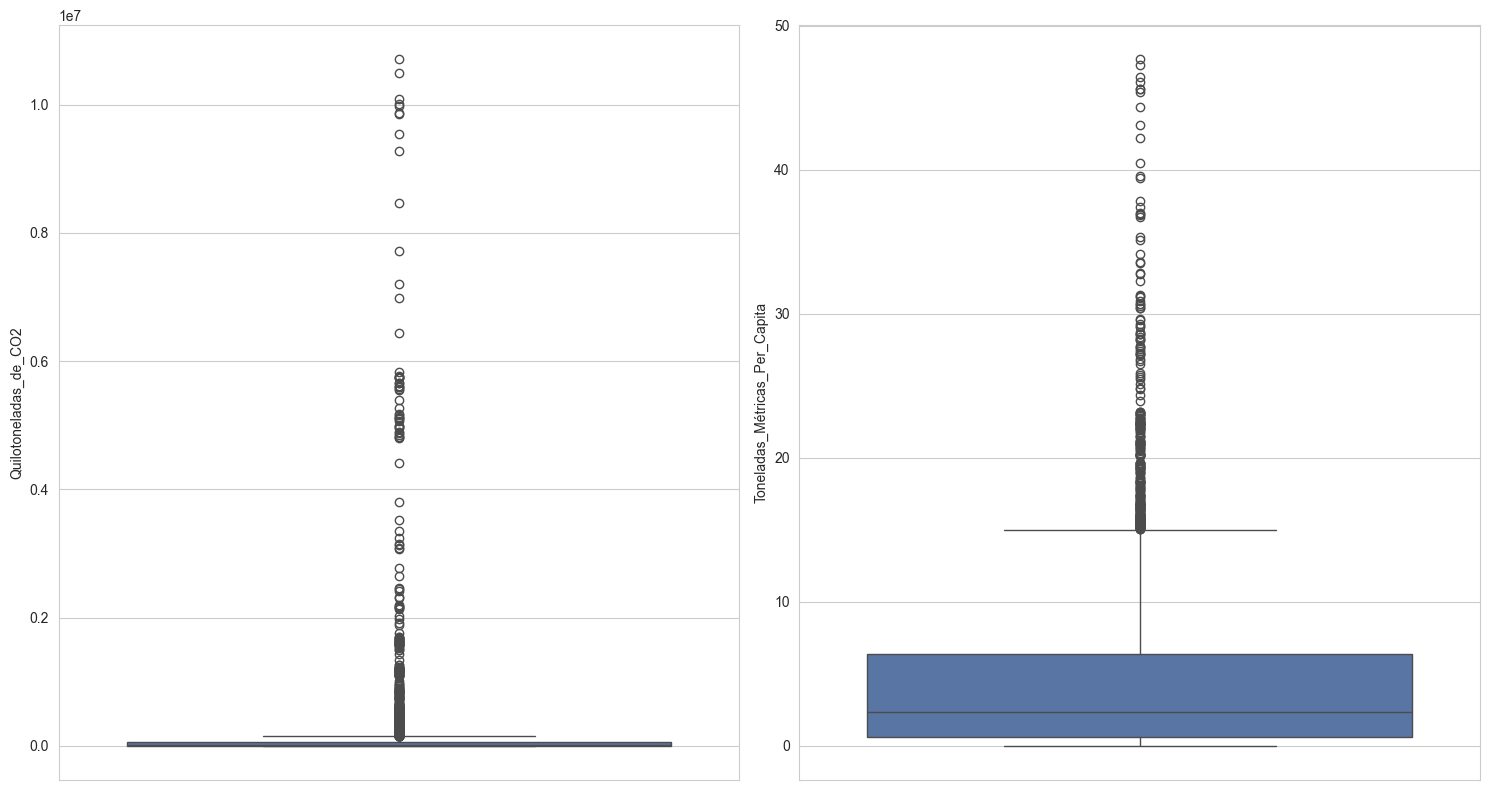

In [542]:
numericas = df.select_dtypes(include='number').columns.tolist()

num_colunas = len(numericas)
num_linhas = (num_colunas//2) + (num_colunas%2)

fig, ax = plt.subplots(num_linhas, num_colunas, figsize=(15,8))
ax=ax.flatten()

for i, var in enumerate(numericas):
    sns.boxplot(data=df, y=var, ax=ax[i])
        
plt.tight_layout()
plt.show()

## Emissão ao longo dos Anos

In [ ]:
agrup = df.groupby(['Data', 'Continente'])[numericas].agg({
    'Quilotoneladas_de_CO2':'sum',
    'Toneladas_Métricas_Per_Capita': 'mean',
    }).reset_index()
colunas_para_plotar = agrup.drop(columns=['Data','Continente'])

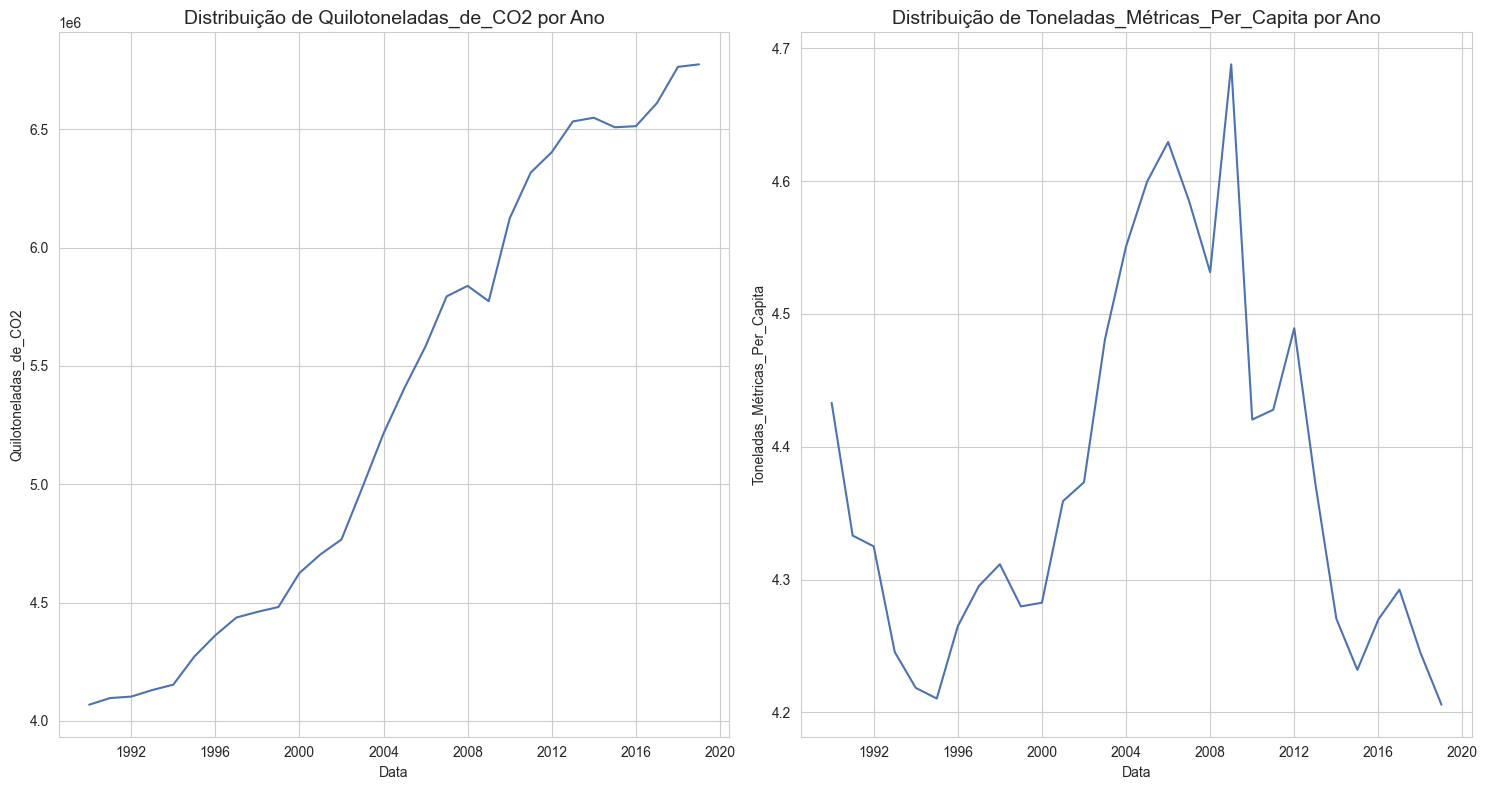

In [607]:
fig,ax = plt.subplots(1,2, figsize=(15,8))
ax = ax.flatten()

for i, coluna in enumerate(colunas_para_plotar):
    sns.lineplot(data=agrup, x='Data', y=coluna, ax=ax[i],errorbar=None)
    ax[i].set_title('Distribuição de ' +coluna+ ' por Ano', fontsize=14)
    
plt.tight_layout()
plt.show()

## Emissão por Continentes

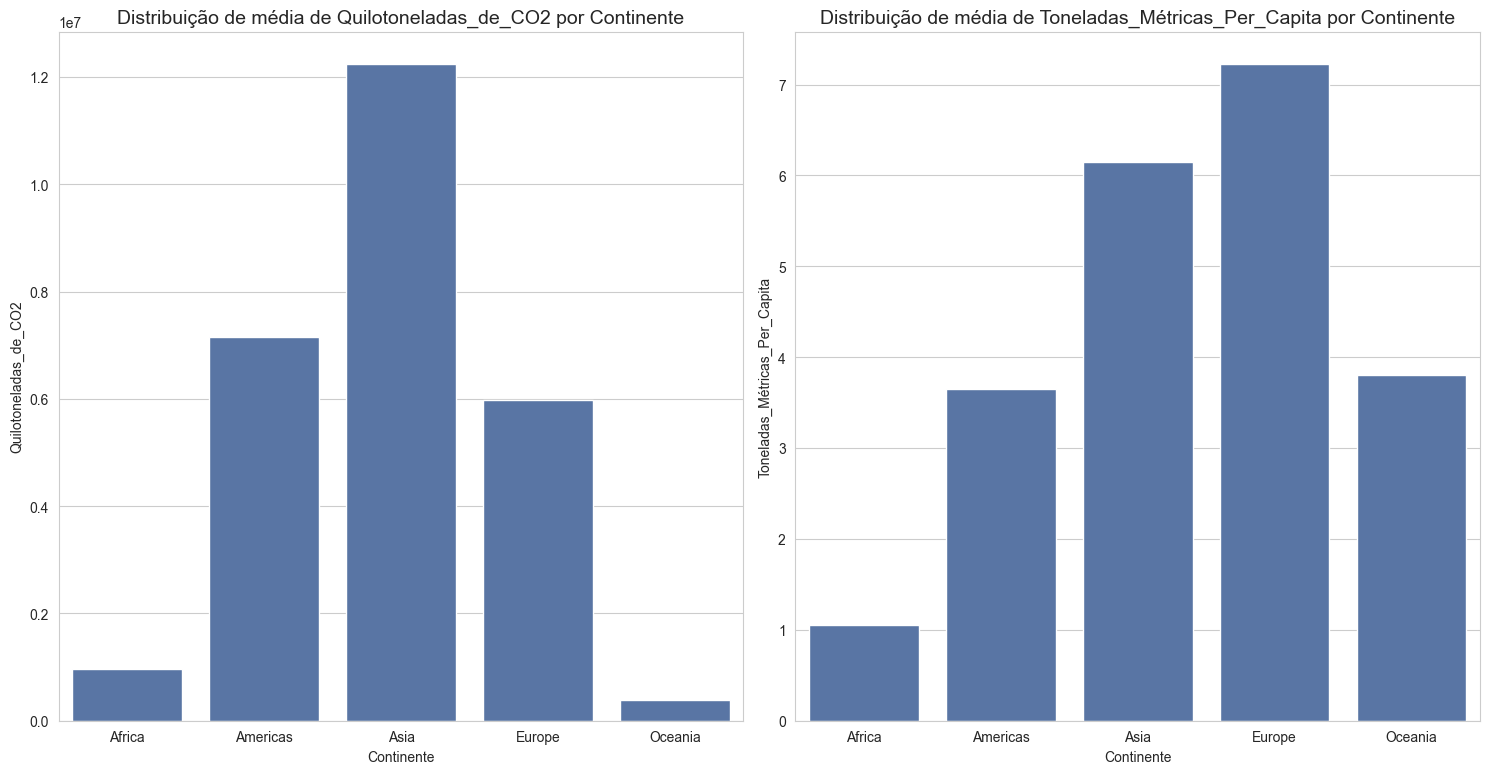

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
ax = ax.flatten()

for i, coluna in enumerate(colunas_para_plotar):
    sns.barplot(data=agrup, x='Continente', y=coluna, ax=ax[i],errorbar=None)
    ax[i].set_title('Distribuição de ' +coluna+ ' por Continente', fontsize=14)
    
plt.tight_layout()
plt.show()

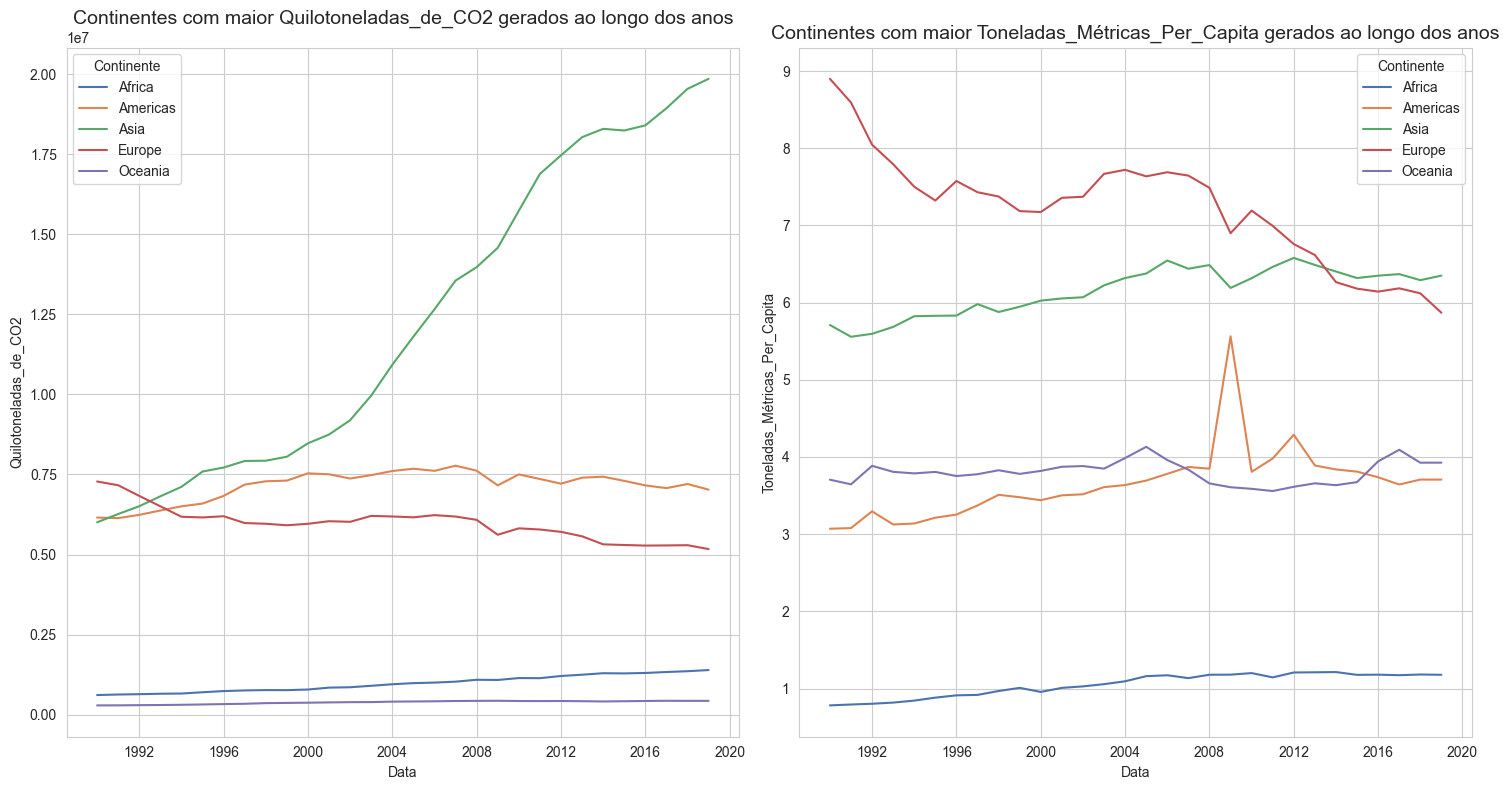

In [596]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax = ax.flatten()
 
for i, coluna in enumerate(colunas_para_plotar):
    sns.lineplot(data=agrup, x='Data', y=coluna, hue='Continente', markers=True, ax=ax[i])
    ax[i].set_title('Continentes com maior '+coluna+' gerados ao longo dos anos',fontsize=14)
   
plt.tight_layout()
plt.show()

## Emissão por Países

In [548]:
paises_mais_emissores = df.groupby('Pais')['Quilotoneladas_de_CO2'].sum().sort_values(ascending=False).head(10).reset_index()
paises_menos_emissores = df.groupby('Pais')['Quilotoneladas_de_CO2'].sum().sort_values(ascending=True).head(10).reset_index()

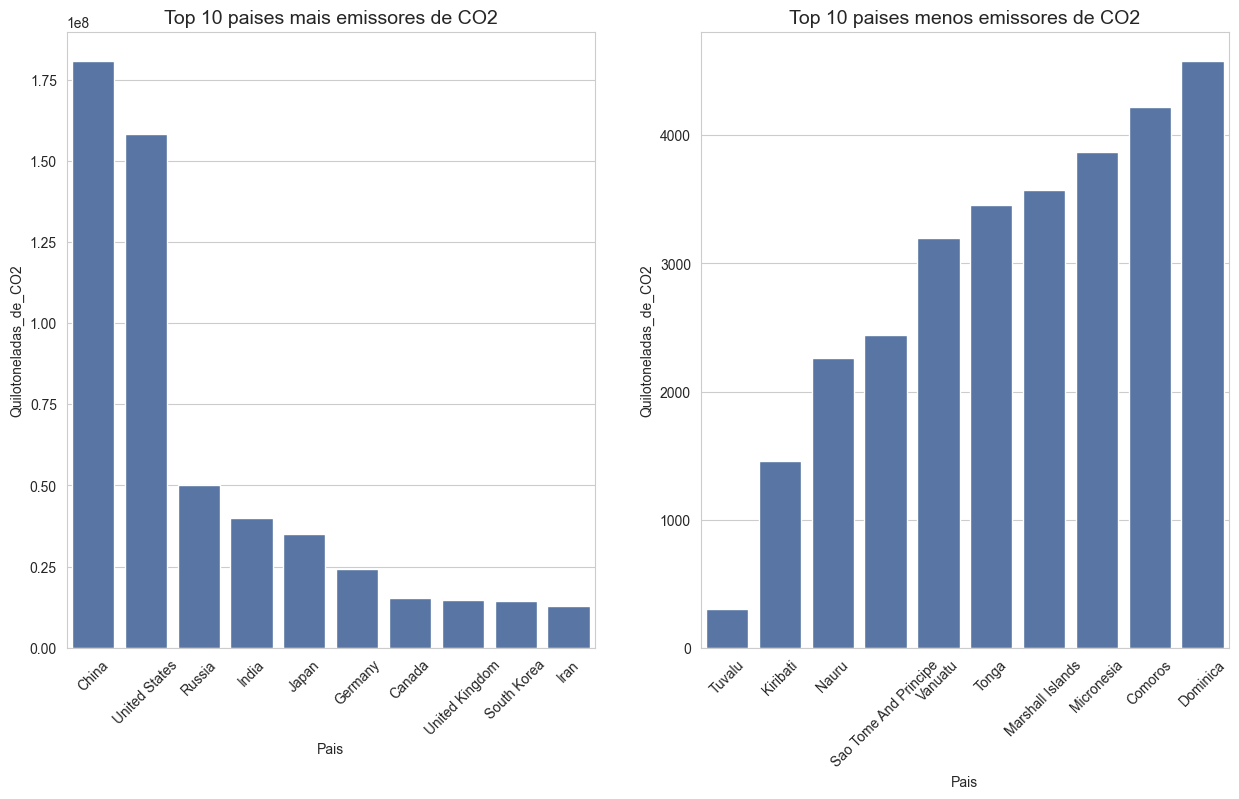

In [549]:
fig,ax = plt.subplots(1,2, figsize=(15,8))

sns.barplot(data=paises_mais_emissores, y='Quilotoneladas_de_CO2', x='Pais', ax=ax[0])
ax[0].set_title('Top 10 paises mais emissores de CO2',fontsize=14)
ax[0].tick_params(axis='x', rotation=45)

sns.barplot(data=paises_menos_emissores, y='Quilotoneladas_de_CO2', x='Pais', ax=ax[1])
ax[1].set_title('Top 10 paises menos emissores de CO2',fontsize=14)
ax[1].tick_params(axis='x', rotation=45)

In [550]:
paises_com_mais_emissores = df.groupby('Pais')['Toneladas_Métricas_Per_Capita'].mean().sort_values(ascending=False).head(10).reset_index()
paises_com_menos_emissores = df.groupby('Pais')['Toneladas_Métricas_Per_Capita'].mean().sort_values(ascending=True).head(10).reset_index()

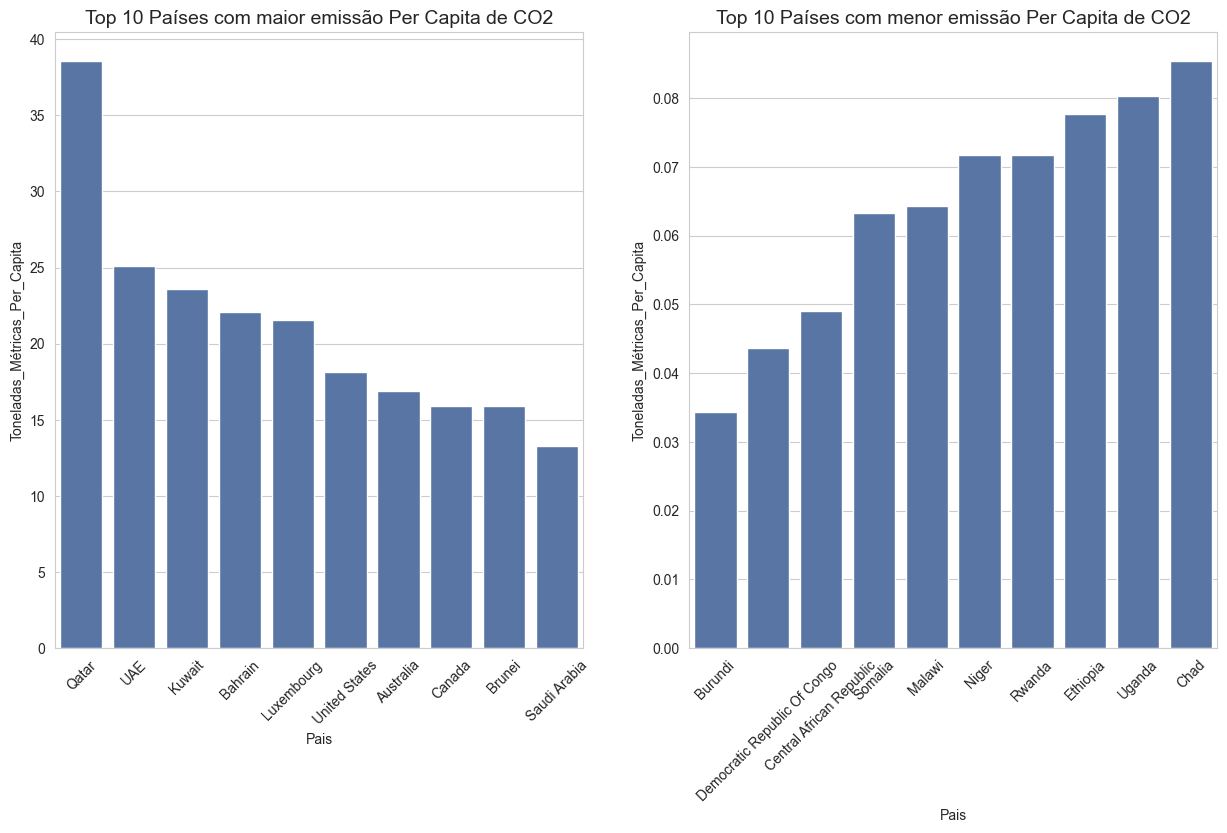

In [551]:
fig,ax = plt.subplots(1,2, figsize=(15,8))

sns.barplot(data=paises_com_mais_emissores, y='Toneladas_Métricas_Per_Capita', x='Pais', ax=ax[0])
ax[0].set_title('Top 10 Países com maior emissão Per Capita de CO2',fontsize=14)
ax[0].tick_params(axis='x', rotation=45)

sns.barplot(data=paises_com_menos_emissores, y='Toneladas_Métricas_Per_Capita', x='Pais', ax=ax[1])
ax[1].set_title('Top 10 Países com menor emissão Per Capita de CO2',fontsize=14)
ax[1].tick_params(axis='x', rotation=45)

In [609]:
top_paises = df.groupby('Pais')['Quilotoneladas_de_CO2'].sum().nlargest(10).index
filtrado = df[df['Pais'].isin(top_paises)]

agrup_pais_data = filtrado.groupby(['Pais', 'Data'])[['Quilotoneladas_de_CO2']].sum().reset_index()

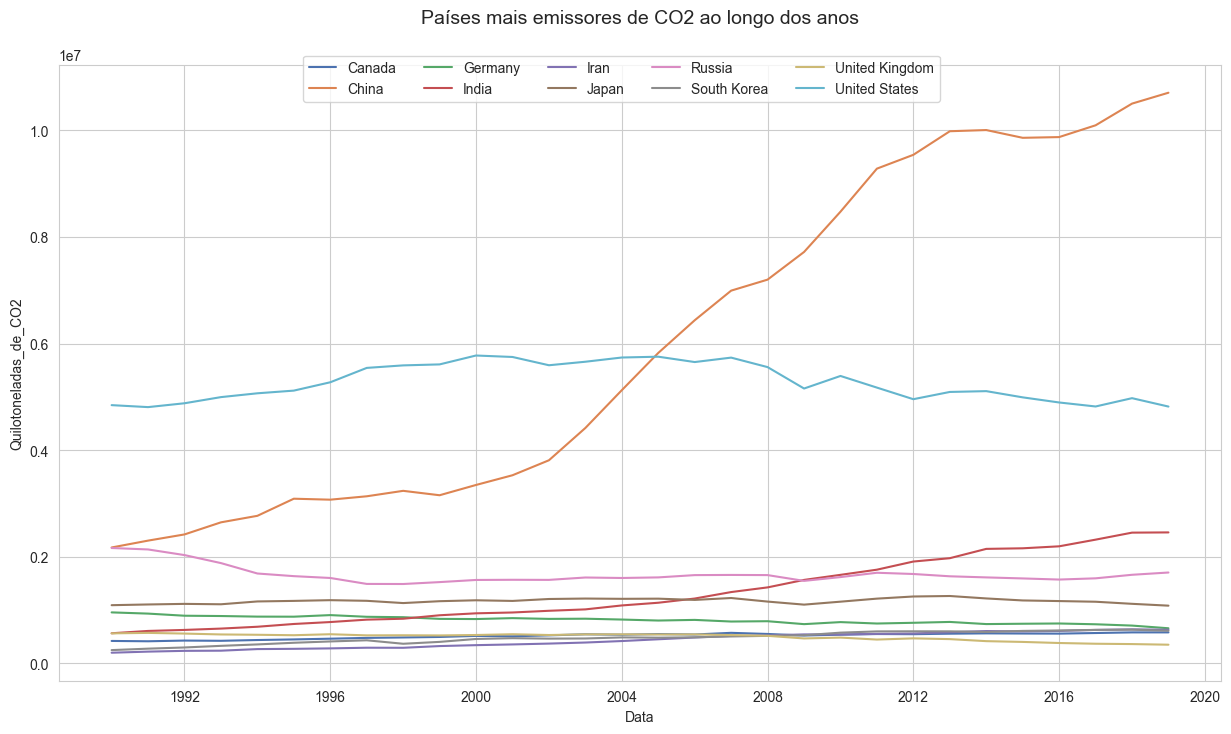

In [610]:
fig,ax = plt.subplots(figsize=(15,8))
sns.lineplot(data=agrup_pais_data, x='Data', y='Quilotoneladas_de_CO2', hue='Pais')
ax.legend().set_visible(False)
ax.set_title('Países mais emissores de CO2 ao longo dos anos', fontsize=14, pad=30)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5,0.9),ncol=5)

plt.show()

In [613]:
top_paises = df.groupby('Pais')['Toneladas_Métricas_Per_Capita'].sum().nlargest(10).index
filtrado = df[df['Pais'].isin(top_paises)]

agrup_pais_data_per_capita = filtrado.groupby(['Pais', 'Data'])[['Toneladas_Métricas_Per_Capita']].mean().reset_index()

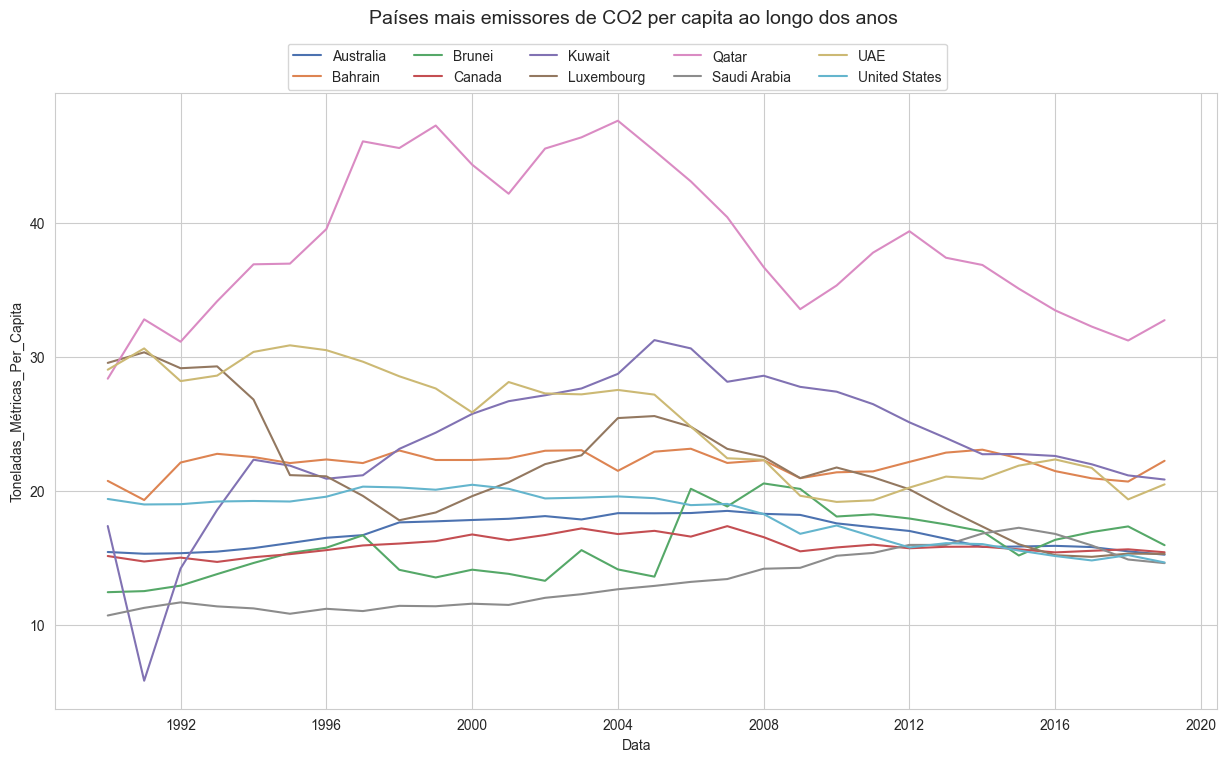

In [619]:
fig,ax = plt.subplots(figsize=(15,8))
sns.lineplot(data=agrup_pais_data_per_capita, x='Data', y='Toneladas_Métricas_Per_Capita', hue='Pais')
ax.legend().set_visible(False)
ax.set_title('Países mais emissores de CO2 per capita ao longo dos anos ', fontsize=14, pad=50)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5,0.95),ncol=5)

plt.show()